In [1]:
import pandas as pd

In [2]:
cefni_data = pd.read_csv('https://raw.githubusercontent.com/snowpepper/agua/master/cefni_data.csv')

In [3]:
cefni_data.head()

,SPT NO,SAMPLING POINT,WQZ,SAMPLE DATE/TIME,PH,Unnamed: 5,CONDUCTIVITY20 C,Unnamed: 7,TURBIDITY,Unnamed: 9,COLOUR,Unnamed: 11,CHLOROPHYLL A,Unnamed: 13
0,NaN,NaN,NaN,NaN,PH UNITS,NaN,US/CM,NaN,FORMAZIN TURBIDITY UNIT,NaN,MG/L PT/CO,NaN,UG/L,NaN
1,622911.0,CEFNI WTW RAW,NaN,14/01/2013 09:15:00,"7,6000",,"264,0000",,"3,0000",,"42,2000",,NaN,
2,622911.0,CEFNI WTW RAW,NaN,24/01/2013 09:41:00,"7,8000",,"330,0000",,"1,9000",,"30,4000",,NaN,
3,622911.0,CEFNI WTW RAW,NaN,30/01/2013 09:24:00,"7,5000",,"259,0000",,"8,6000",,"37,8400",,NaN,
4,622911.0,CEFNI WTW RAW,NaN,05/02/2013 10:05:00,"7,8000",,"267,0000",,"4,5000",,"34,4000",,"2,0000",


In [4]:
df = cefni_data[['SAMPLE DATE/TIME', 'PH', 'CONDUCTIVITY20 C', 'TURBIDITY', 'COLOUR', 'CHLOROPHYLL A']]

In [5]:
df.head()

,SAMPLE DATE/TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
0,NaN,PH UNITS,US/CM,FORMAZIN TURBIDITY UNIT,MG/L PT/CO,UG/L
1,14/01/2013 09:15:00,"7,6000","264,0000","3,0000","42,2000",NaN
2,24/01/2013 09:41:00,"7,8000","330,0000","1,9000","30,4000",NaN
3,30/01/2013 09:24:00,"7,5000","259,0000","8,6000","37,8400",NaN
4,05/02/2013 10:05:00,"7,8000","267,0000","4,5000","34,4000","2,0000"


In [6]:
df.drop([0], axis=0, inplace=True)

/mnt/c/Users/Rodrigo Oliveira/www/machine-learning/.env/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df.head()

,SAMPLE DATE/TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,14/01/2013 09:15:00,"7,6000","264,0000","3,0000","42,2000",NaN
2,24/01/2013 09:41:00,"7,8000","330,0000","1,9000","30,4000",NaN
3,30/01/2013 09:24:00,"7,5000","259,0000","8,6000","37,8400",NaN
4,05/02/2013 10:05:00,"7,8000","267,0000","4,5000","34,4000","2,0000"
5,14/02/2013 11:06:00,NaN,NaN,NaN,NaN,"4,0000"


In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

<AxesSubplot:>

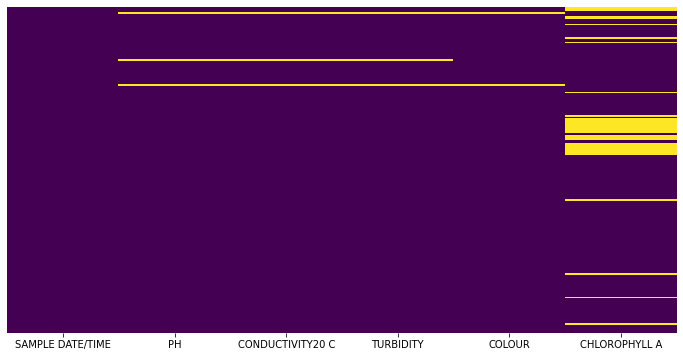

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
df.head()

,SAMPLE DATE/TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,14/01/2013 09:15:00,"7,6000","264,0000","3,0000","42,2000",NaN
2,24/01/2013 09:41:00,"7,8000","330,0000","1,9000","30,4000",NaN
3,30/01/2013 09:24:00,"7,5000","259,0000","8,6000","37,8400",NaN
4,05/02/2013 10:05:00,"7,8000","267,0000","4,5000","34,4000","2,0000"
5,14/02/2013 11:06:00,NaN,NaN,NaN,NaN,"4,0000"


In [12]:
df['DATE'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[0])

<ipython-input-12-abeb7b0b4123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[0])


In [13]:
df['TIME'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[1])

<ipython-input-13-89008467447f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIME'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[1])


In [14]:
df['YEAR'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[0][-4:])

<ipython-input-14-b87b5c99d3bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = df['SAMPLE DATE/TIME'].apply(lambda cell: cell.split(' ')[0][-4:])


In [15]:
df = df[['YEAR', 'DATE', 'TIME', 'PH', 'CONDUCTIVITY20 C', 'TURBIDITY', 'COLOUR', 'CHLOROPHYLL A']]

In [16]:
df.head()

,YEAR,DATE,TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,2013,14/01/2013,09:15:00,"7,6000","264,0000","3,0000","42,2000",NaN
2,2013,24/01/2013,09:41:00,"7,8000","330,0000","1,9000","30,4000",NaN
3,2013,30/01/2013,09:24:00,"7,5000","259,0000","8,6000","37,8400",NaN
4,2013,05/02/2013,10:05:00,"7,8000","267,0000","4,5000","34,4000","2,0000"
5,2013,14/02/2013,11:06:00,NaN,NaN,NaN,NaN,"4,0000"


In [17]:
df.fillna('0,0', inplace=True)

<AxesSubplot:>

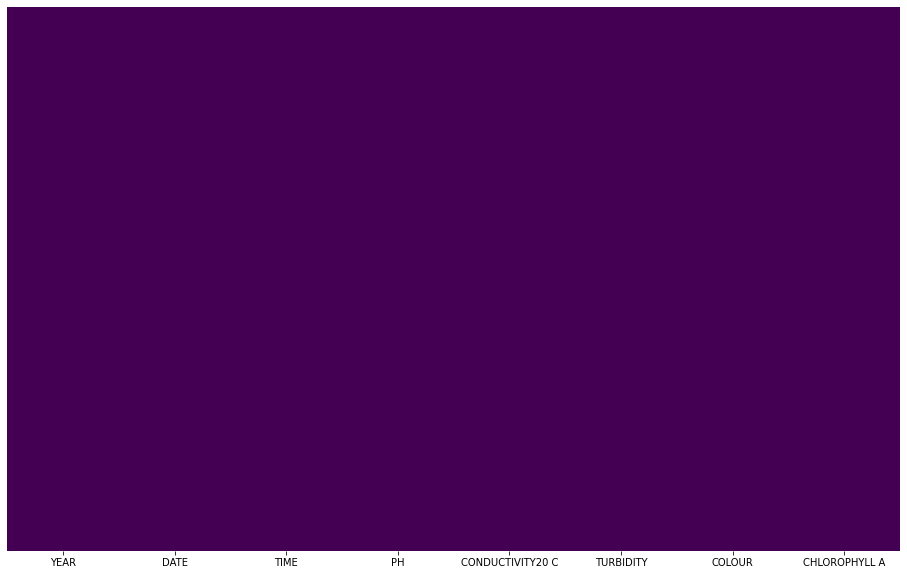

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.head()

,YEAR,DATE,TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,2013,14/01/2013,09:15:00,"7,6000","264,0000","3,0000","42,2000","0,0"
2,2013,24/01/2013,09:41:00,"7,8000","330,0000","1,9000","30,4000","0,0"
3,2013,30/01/2013,09:24:00,"7,5000","259,0000","8,6000","37,8400","0,0"
4,2013,05/02/2013,10:05:00,"7,8000","267,0000","4,5000","34,4000","2,0000"
5,2013,14/02/2013,11:06:00,"0,0","0,0","0,0","0,0","4,0000"


## Correção de tipagem

In [20]:
df['PH'] = df['PH'].apply(lambda a: a.replace(',', '.')).astype(float)
df['CONDUCTIVITY20 C'] = df['CONDUCTIVITY20 C'].apply(lambda a: a.replace(',', '.')).astype(float)
df['TURBIDITY'] = df['TURBIDITY'].apply(lambda a: a.replace(',', '.')).astype(float)
df['COLOUR'] = df['COLOUR'].apply(lambda a: a.replace(',', '.')).astype(float)
df['CHLOROPHYLL A'] = df['CHLOROPHYLL A'].apply(lambda a: a.replace(',', '.')).astype(float)

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%Y', dayfirst=True)
df['TIME'] = pd.to_datetime(df['TIME'],format='%H:%M:%S')

In [22]:
df.head()

,YEAR,DATE,TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,2013,2013-01-14,1900-01-01 09:15:00,7.6,264.0,3.0,42.20,0.0
2,2013,2013-01-24,1900-01-01 09:41:00,7.8,330.0,1.9,30.40,0.0
3,2013,2013-01-30,1900-01-01 09:24:00,7.5,259.0,8.6,37.84,0.0
4,2013,2013-02-05,1900-01-01 10:05:00,7.8,267.0,4.5,34.40,2.0
5,2013,2013-02-14,1900-01-01 11:06:00,0.0,0.0,0.0,0.00,4.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 1 to 221
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   YEAR              221 non-null    object        
 1   DATE              221 non-null    datetime64[ns]
 2   TIME              221 non-null    datetime64[ns]
 3   PH                221 non-null    float64       
 4   CONDUCTIVITY20 C  221 non-null    float64       
 5   TURBIDITY         221 non-null    float64       
 6   COLOUR            221 non-null    float64       
 7   CHLOROPHYLL A     221 non-null    float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 15.5+ KB


In [24]:
group_by_year = df.groupby(['YEAR'])

In [25]:
group_by_year.describe()

PH                                                 CONDUCTIVITY20 C  \
     count      mean       std  min  25%   50%    75%  max            count   
YEAR                                                                          
2013  49.0  7.546939  1.594666  0.0  7.7  7.80  8.000  8.6             49.0   
2014  70.0  7.842857  1.022014  0.0  7.7  7.85  8.375  8.6             70.0   
2015  47.0  8.063830  0.146593  7.7  8.0  8.10  8.200  8.4             47.0   
2016  55.0  8.074545  0.276364  7.6  7.9  8.00  8.200  8.9             55.0   

                  ...    COLOUR        CHLOROPHYLL A                           \
            mean  ...       75%    max         count      mean       std  min   
YEAR              ...                                                           
2013  265.367347  ...  40.12000  86.45          49.0  5.316122  6.509407  0.0   
2014  275.742857  ...  36.30175  86.00          70.0  5.145143  9.004676  0.0   
2015  268.510638  ...  41.00000  80.00          47.0  8.434043  6.252598  0.0   
2016  257.818182  ...  43.00000  71.00          55.0  7.990545  9.355186  0.0   

                                  
        25%   50%     75%    max  
YEAR                              
2013  1.950  3.13   5.630  32.40  
2014  0.000  1.98   3.925  45.52  
2015  4.135  6.88  10.420  29.39  
2016  2.175  3.54  10.980  47.05  

[4 rows x 40 columns]

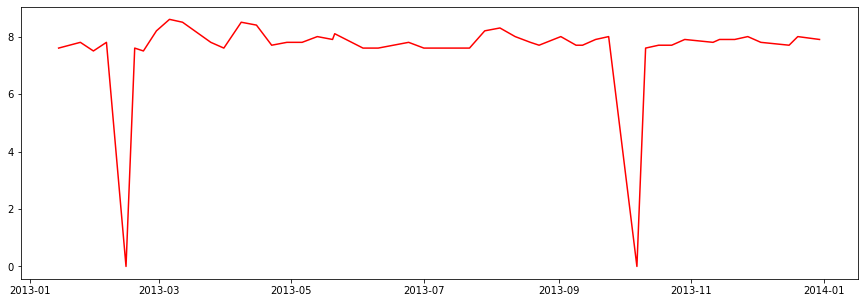

In [26]:
plt.figure(figsize=(15,5))
plt.plot(df[df['YEAR'] == '2013']['DATE'], df[df['YEAR'] == '2013']['PH'], color='red')

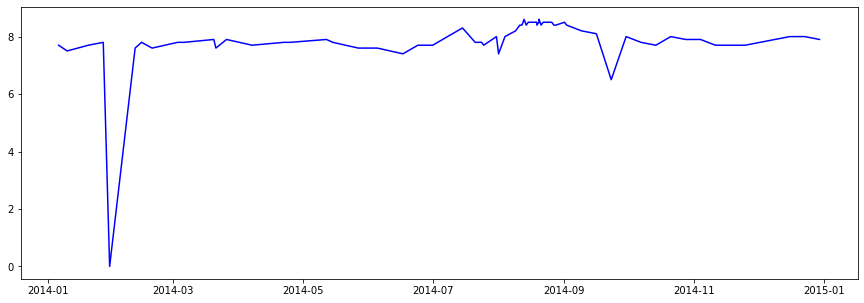

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df[df['YEAR'] == '2014']['DATE'], df[df['YEAR'] == '2014']['PH'], color='blue')

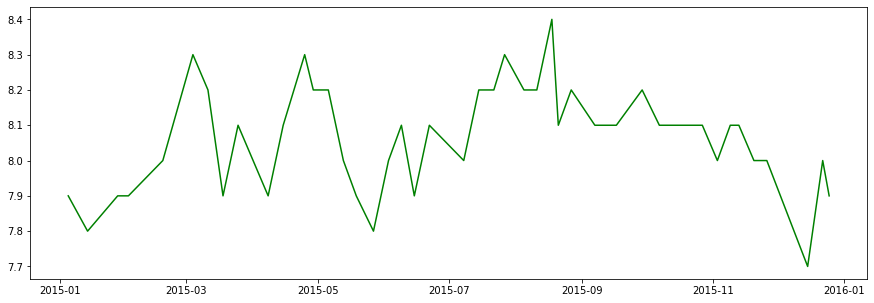

In [28]:
plt.figure(figsize=(15,5))
plt.plot(df[df['YEAR'] == '2015']['DATE'], df[df['YEAR'] == '2015']['PH'], color='green')

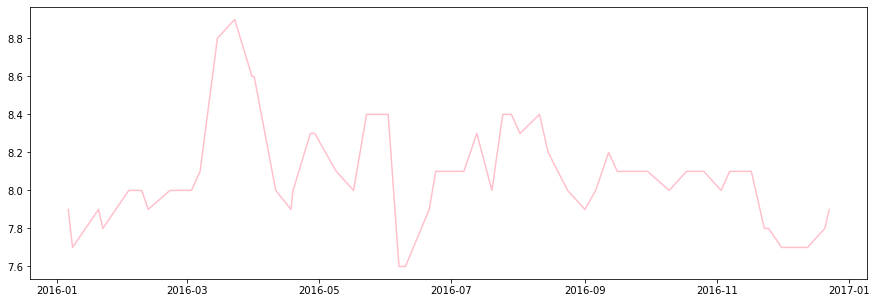

In [29]:
plt.figure(figsize=(15,5))
plt.plot(df[df['YEAR'] == '2016']['DATE'], df[df['YEAR'] == '2016']['PH'], color='pink')

In [30]:
df.head()

,YEAR,DATE,TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,2013,2013-01-14,1900-01-01 09:15:00,7.6,264.0,3.0,42.20,0.0
2,2013,2013-01-24,1900-01-01 09:41:00,7.8,330.0,1.9,30.40,0.0
3,2013,2013-01-30,1900-01-01 09:24:00,7.5,259.0,8.6,37.84,0.0
4,2013,2013-02-05,1900-01-01 10:05:00,7.8,267.0,4.5,34.40,2.0
5,2013,2013-02-14,1900-01-01 11:06:00,0.0,0.0,0.0,0.00,4.0


In [31]:
import calendar 

In [32]:
months = {month: calendar.month_abbr[month] for month in range(1, 13)}

In [33]:
df['MONTH'] = df['DATE'].apply(lambda cell: months[cell.month])

In [34]:
df.head()

,YEAR,DATE,TIME,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A,MONTH
1,2013,2013-01-14,1900-01-01 09:15:00,7.6,264.0,3.0,42.20,0.0,Jan
2,2013,2013-01-24,1900-01-01 09:41:00,7.8,330.0,1.9,30.40,0.0,Jan
3,2013,2013-01-30,1900-01-01 09:24:00,7.5,259.0,8.6,37.84,0.0,Jan
4,2013,2013-02-05,1900-01-01 10:05:00,7.8,267.0,4.5,34.40,2.0,Feb
5,2013,2013-02-14,1900-01-01 11:06:00,0.0,0.0,0.0,0.00,4.0,Feb


In [35]:
df.columns

Index(['YEAR', 'DATE', 'TIME', 'PH', 'CONDUCTIVITY20 C', 'TURBIDITY', 'COLOUR',
       'CHLOROPHYLL A', 'MONTH'],
      dtype='object')

In [36]:
df = df[['YEAR', 'MONTH', 'DATE' , 'PH', 'CONDUCTIVITY20 C', 'TURBIDITY', 'COLOUR','CHLOROPHYLL A']]

In [37]:
df = df[['YEAR', 'MONTH', 'PH', 'CONDUCTIVITY20 C', 'TURBIDITY', 'COLOUR','CHLOROPHYLL A']]

In [569]:
df_2013 = df[df['YEAR'] == '2013']
df_2014 = df[df['YEAR'] == '2014']
df_2015 = df[df['YEAR'] == '2015']
df_2016 = df[df['YEAR'] == '2016']

In [570]:
g2013 = df_2013.groupby('MONTH')
g2014 = df_2014.groupby('MONTH')
g2015 = df_2015.groupby('MONTH')
g2016 = df_2016.groupby('MONTH')

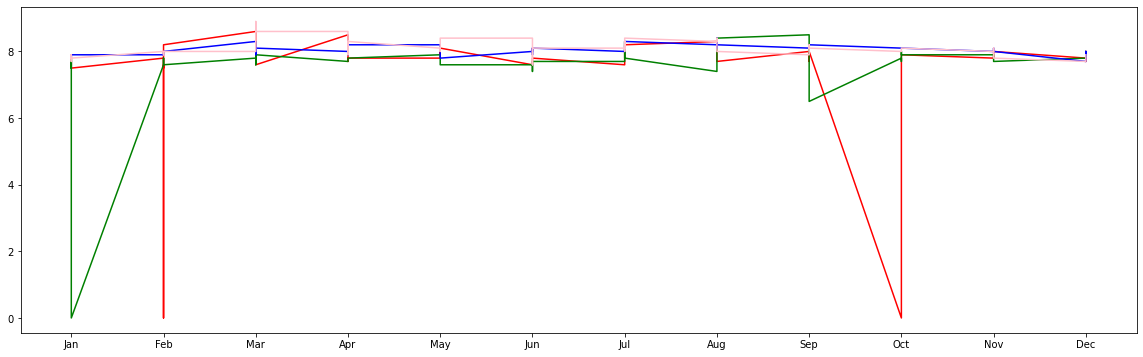

In [571]:
plt.figure(figsize=(20,6))
plt.plot(g2013['MONTH'].head(), g2013['PH'].head(), color='red')
plt.plot(g2014['MONTH'].head(), g2014['PH'].head(), color='green')
plt.plot(g2015['MONTH'].head(), g2015['PH'].head(), color='blue')
plt.plot(g2016['MONTH'].head(), g2016['PH'].head(), color='pink')

In [572]:
g2013.mean()

,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
MONTH,,,,,
Apr,8.100000,259.250000,2.600000,21.182500,11.375000
Aug,7.950000,266.000000,3.100000,26.362500,9.070000
Dec,7.850000,293.500000,3.760000,38.165000,3.300000
Feb,6.220000,209.000000,5.020000,28.164000,3.060000
Jan,7.633333,284.333333,4.500000,36.813333,0.000000
Jul,7.800000,286.333333,2.633333,25.933333,2.386667
Jun,7.675000,305.500000,1.975000,24.950000,4.375000
Mar,8.125000,256.000000,7.600000,33.165000,12.375000
May,7.950000,286.000000,2.185000,22.927500,8.325000


In [573]:
g2013 = pd.DataFrame(g2013.head())

In [574]:
g2013.replace(0.0, np.nan, inplace=True)

<AxesSubplot:>

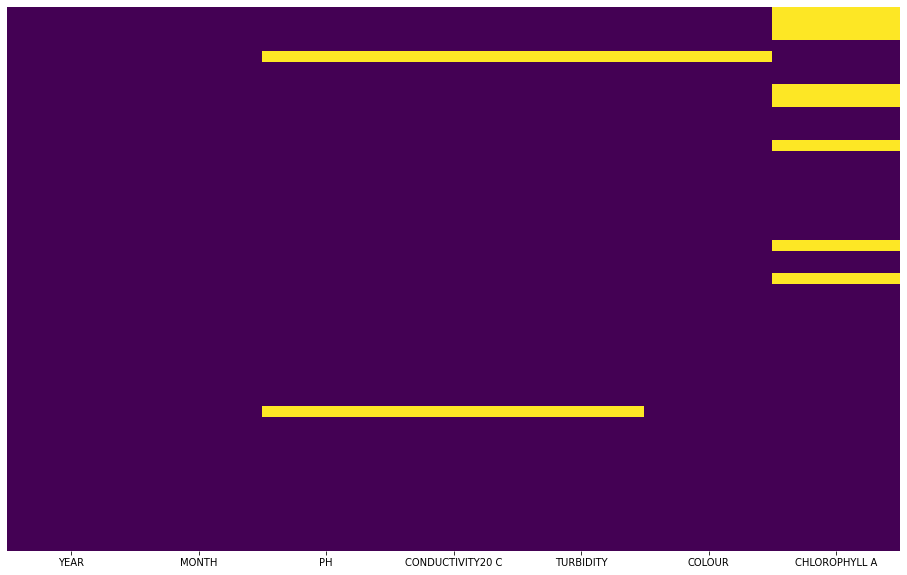

In [575]:
plt.figure(figsize=(16,10))
sns.heatmap(g2013.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#Mes Jan
g2013_jan = g2013[g2013['MONTH'] == 'Jan']
g2013_jan = pd.DataFrame(g2013_jan)

ph_mean = g2013_jan['PH'].mean()

g2013_jan.replace(0.0, np.nan, inplace=True)

tam = g2013_jan['PH'].isnull().sum()
print('===', tam)

if tam > 0:
    g2013_jan['PH'] = g2013_jan['PH'].fillna(ph_mean, limit=tam)


In [576]:
g2013 = pd.DataFrame(g2013.head())

In [577]:
## comb
def fill_mean_in_nan(column, dataframe_year, months_datetime):
    #dataframe_year = pd.DataFrame(dataframe_year.head())
    
    months_data = []
    
    for key in months_datetime.keys():
        
        g2013_month = dataframe_year[dataframe_year['MONTH'] == months_datetime[key]]
        g2013_montn = pd.DataFrame(g2013_month)
        
        qtd_nan = g2013_month[column].isna().sum()
        
        if qtd_nan > 0:
            g2013_month[column] = g2013_month[column].fillna(ph_mean, limit=qtd_nan)
        
        months_data.append(g2013_month)
        
    return months_data

In [578]:
a = fill_mean_in_nan('PH',g2013, months)

<ipython-input-577-9bd9d85f4c7c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2013_month[column] = g2013_month[column].fillna(ph_mean, limit=qtd_nan)


In [579]:
a

[   YEAR MONTH   PH  CONDUCTIVITY20 C  TURBIDITY  COLOUR  CHLOROPHYLL A
 1  2013   Jan  7.6             264.0        3.0   42.20            NaN
 2  2013   Jan  7.8             330.0        1.9   30.40            NaN
 3  2013   Jan  7.5             259.0        8.6   37.84            NaN,
    YEAR MONTH        PH  CONDUCTIVITY20 C  TURBIDITY  COLOUR  CHLOROPHYLL A
 4  2013   Feb  7.800000             267.0        4.5    34.4            2.0
 5  2013   Feb  7.633333               NaN        NaN     NaN            4.0,
 Empty DataFrame
 Columns: [YEAR, MONTH, PH, CONDUCTIVITY20 C, TURBIDITY, COLOUR, CHLOROPHYLL A]
 Index: [],
 Empty DataFrame
 Columns: [YEAR, MONTH, PH, CONDUCTIVITY20 C, TURBIDITY, COLOUR, CHLOROPHYLL A]
 Index: [],
 Empty DataFrame
 Columns: [YEAR, MONTH, PH, CONDUCTIVITY20 C, TURBIDITY, COLOUR, CHLOROPHYLL A]
 Index: [],
 Empty DataFrame
 Columns: [YEAR, MONTH, PH, CONDUCTIVITY20 C, TURBIDITY, COLOUR, CHLOROPHYLL A]
 Index: [],
 Empty DataFrame
 Columns: [YEAR, MONTH, PH

In [581]:
a[1]

,YEAR,MONTH,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
4,2013,Feb,7.800000,267.0,4.5,34.4,2.0
5,2013,Feb,7.633333,NaN,NaN,NaN,4.0


In [555]:
a[2]

,YEAR,MONTH,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A


In [270]:
g2013_month = g2013[g2013['MONTH'] == months_datetime[key]]

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [536]:
g2013_fev['PH']

4    7.80
5    6.22
6    7.60
7    7.50
8    8.20
Name: PH, dtype: float64

TypeError: __init__() takes from 1 to 6 positional arguments but 13 were given

<AxesSubplot:>

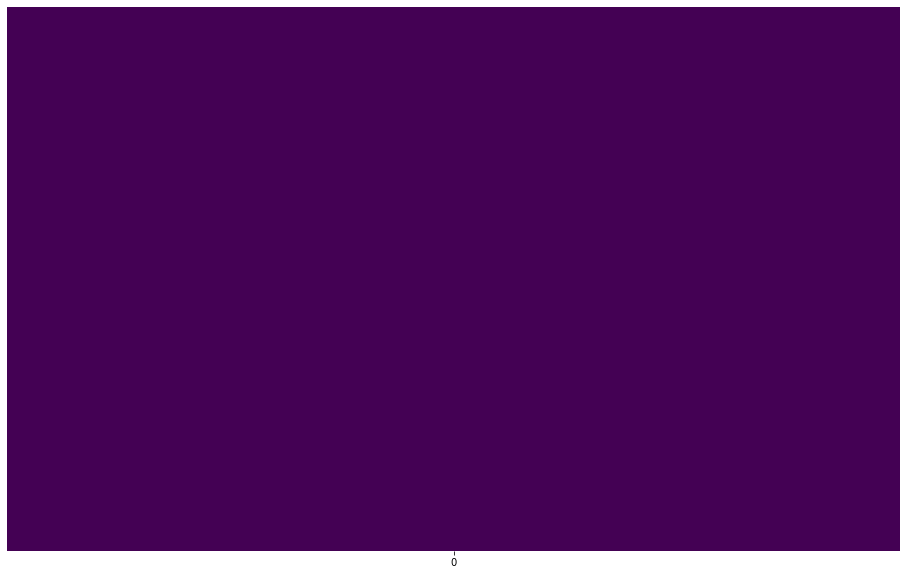

In [502]:
plt.figure(figsize=(16,10))
sns.heatmap(pd.DataFrame(a).isnull(), yticklabels=False, cbar=False, cmap='viridis')

,YEAR,MONTH,PH,CONDUCTIVITY20 C,TURBIDITY,COLOUR,CHLOROPHYLL A
1,2013,Jan,7.6,264.0,3.00,42.200,0.00
2,2013,Jan,7.8,330.0,1.90,30.400,0.00
3,2013,Jan,7.5,259.0,8.60,37.840,0.00
4,2013,Feb,7.8,267.0,4.50,34.400,2.00
5,2013,Feb,0.0,0.0,0.00,0.000,4.00
6,2013,Feb,7.6,240.0,8.70,40.140,4.20
7,2013,Feb,7.5,288.0,7.40,35.530,5.10
8,2013,Feb,8.2,250.0,4.50,30.750,0.00
9,2013,Mar,8.6,257.0,5.70,27.730,0.00
10,2013,Mar,8.5,265.0,4.70,25.060,25.10


In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="MONTH", y="PH", hue="YEAR")
plt.xlabel("Meses")
plt.ylabel("pH")
plt.title("Índice de pH por ano")


In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="MONTH", y="CONDUCTIVITY20 C", hue="YEAR")
plt.xlabel("Meses")
plt.ylabel("Condutividade")
plt.title("Índice de condutividade por ano")


In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="MONTH", y="TURBIDITY", hue="YEAR")
plt.xlabel("Meses")
plt.ylabel("Turbidez")
plt.title("Índice de turbidez por ano")

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="MONTH", y="COLOUR", hue="YEAR")
plt.xlabel("Meses")
plt.ylabel("Cor")
plt.title("Índice de cor (ano)")

In [ ]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="MONTH", y="CHLOROPHYLL A", hue="YEAR")
plt.xlabel("Meses")
plt.ylabel("Clorofila")
plt.title("Índice de clorofila (ano)")